Rachael Muriuki <br>
CS-DA01-25122 <br>
Deep Learning Assignment <br>

1.Importing Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

2.Loading MNIST Dataset

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#Display shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_train shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (60000, 28, 28)
X_train shape: (10000, 28, 28)
Y_train shape: (60000,)
Y_test shape: (10000,)


3.Data Preprocessing

In [ ]:
X_train = X_train / 255.0 #Normalize pixel values to [0,1]
X_test = X_test / 255.0

Y_train_cat = to_categorical(Y_train, 10) #One-hot encode labels
Y_test_cat = to_categorical(Y_test, 10)

4.Visualize sample image

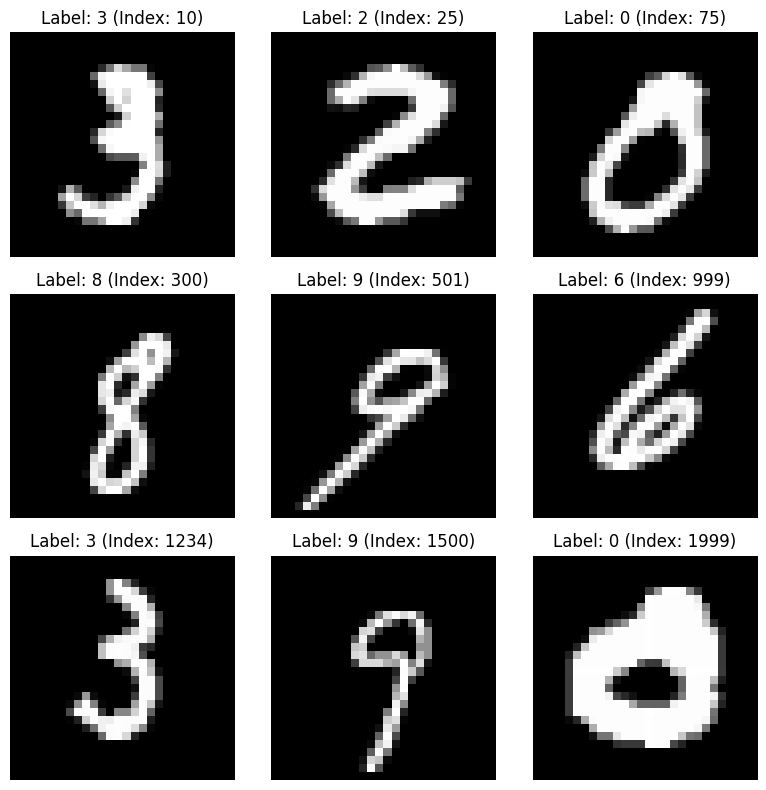

In [ ]:
selected_indices = [10, 25, 75, 300, 501, 999, 1234, 1500, 1999]
plt.figure(figsize = (8, 8))
for i, idx in enumerate(selected_indices):
  plt.subplot(3, 3, i + 1)
  plt.imshow(X_train[idx], cmap = 'gray')
  plt.title(f"Label: {Y_train[idx]} (Index: {idx})")
  plt.axis('off')
plt.tight_layout()
plt.show()

5.Building the ANN Model

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0,3),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6.Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

7.Train the Model

In [ ]:
history=model.fit(X_train, Y_train_cat,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3669 - loss: 1.9195 - val_accuracy: 0.7970 - val_loss: 0.7110
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7686 - loss: 0.7430 - val_accuracy: 0.8880 - val_loss: 0.4166
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8466 - loss: 0.5146 - val_accuracy: 0.9090 - val_loss: 0.3229
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8728 - loss: 0.4277 - val_accuracy: 0.9185 - val_loss: 0.2782
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8887 - loss: 0.3770 - val_accuracy: 0.9315 - val_loss: 0.2501
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8981 - loss: 0.3449 - val_accuracy: 0.9323 - val_loss: 0.2293
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9093 - loss: 0.3082 - val_accuracy: 0.9363 - val_loss: 0.2127
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9136 - loss: 0.2931 - val_accuracy: 0.

8.Evaluate the Model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9251 - loss: 0.2286
Test Accuracy: 0.9365


9.Plot training history

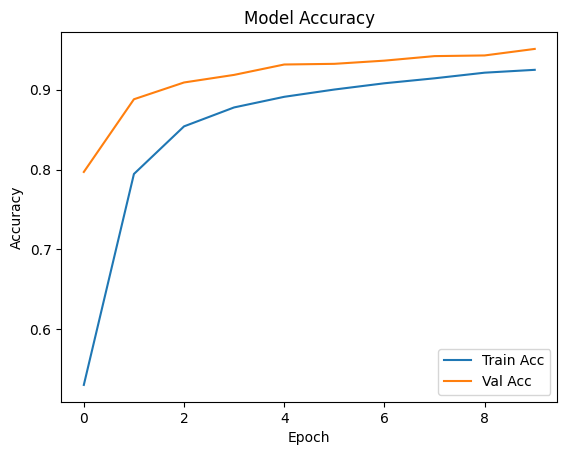

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

10.Confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


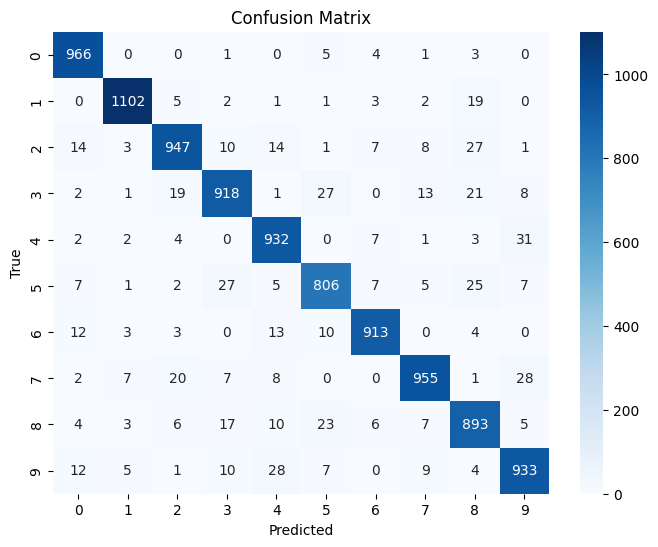

In [ ]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred, axis=1)

cm=confusion_matrix(Y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

11.Classification Report

In [ ]:
print(classification_report(Y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.97      0.97      1135
           2       0.94      0.92      0.93      1032
           3       0.93      0.91      0.92      1010
           4       0.92      0.95      0.93       982
           5       0.92      0.90      0.91       892
           6       0.96      0.95      0.96       958
           7       0.95      0.93      0.94      1028
           8       0.89      0.92      0.90       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



12.Save and Reload the Model

In [ ]:
model.save("mnist_ann_model.h5")

from tensorflow.keras.models import load_model
reloaded_model = load_model("mnist_ann_model.h5")
reloaded_model.evaluate(X_test, Y_test_cat)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9251 - loss: 0.2286


[0.20432893931865692, 0.9365000128746033]